In [1]:
# Data processing
import pandas as pd
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning process
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# features analysis libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

%matplotlib inline

In [37]:
# Ambil data

df_bank_add_full = pd.read_csv('bank-additional-full.csv')

In [38]:
# Menampilkan 5 data teratas

df_bank_add_full.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [39]:
df_bank_add_full.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94767.0,-50.8,1028.0,4963.6,no


In [40]:
# Mengetahui dimensi dataset
df_bank_add_full.shape

(41188, 21)

In [41]:
# Mengetahui features dataset
df_bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [42]:
# Pengelompokkan data berdasarkan tipe data

numerical_columns = list(df_bank_add_full.select_dtypes(include=['int64']).columns.values) + list(df_bank_add_full.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df_bank_add_full.select_dtypes(include=['object']))

In [43]:
# Print variable numerical columns
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [44]:
# Print variable categorical
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [45]:
# deskriptif statistik untuk data latih
df_bank_add_full[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,85401.579955,-40.502600,3180.107207,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,26471.506796,4.628198,2086.690436,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,93.200000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,92893.000000,-42.700000,1281.000000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93749.000000,-41.800000,4856.000000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93994.000000,-36.400000,4961.000000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94767.000000,-26.900000,5045.000000,5228.100000


In [46]:
df_bank_add_full.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [47]:
# Data cleaning
# Berdasarkan soal, missing values ditandai dengan label "unknown" pada beberapa kolom. Oleh karena itu perlu kita ganti dengan nilai tertentu
# Mengetahui jumlah data "unknown" pada setiap kolom atribut/features

df_bank_add_full[df_bank_add_full[categorical_columns]=='unknown'].count().sort_values(ascending=False)


default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [48]:
# Mengganti data "unknown" mnejadi nan

df_bank_add_full[df_bank_add_full[categorical_columns]=='unknown'] = np.NaN

In [49]:
# cek kembali apakah data "unknown" sudah berubah

df_bank_add_full[df_bank_add_full[categorical_columns]=='unknown'].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [50]:
# melihat perubahan data awal setelah dilakukan perubahan missing value

df_bank_add_full[categorical_columns].head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [51]:
# Melihat unstandard missing values pada kolom numerikal

df_bank_add_full[numerical_columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
1,57,149,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
2,37,226,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
3,40,151,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0
4,56,307,1,999,0,1.1,93994.0,-36.4,4857.0,5191.0


Terlihat bahwa atribut pdays ada nilai 999 yang menandakan klien sebelumnya tidak dihubungi. Ini bisa diganti dengan nilai 0. Akan diperiksa juga nilai-nilai yang "aneh" untuk atribut numerikal lainnya

In [54]:
# mengganti nilai 999 pada pdays 
df_bank_add_full['pdays'].replace(999,0,inplace=True)

In [56]:
# Memeriksa missing values pada data train
print("Jumlah nan missing values atribut kategori = ",df_bank_add_full[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",df_bank_add_full[numerical_columns].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  12718
Jumlah nan missing values atribut numerikal =  0


In [58]:
# categorical data
df_categorical = df_bank_add_full[categorical_columns]

# numerical data
df_numerical = df_bank_add_full[numerical_columns]

In [59]:
# instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [60]:
# fit dengan data training
imputer_categorical.fit(df_categorical)

SimpleImputer(strategy='most_frequent')

In [61]:
# transform ke data latih
df_categorical = imputer_categorical.transform(df_categorical)

In [62]:
# buat hasil array ke dalam dataframe
df_categorical = pd.DataFrame(df_categorical,columns=categorical_columns)

In [63]:
# Gabung categorical columns dengan numerical columns

df_bank = pd.concat([df_numerical,df_categorical],axis=1)

In [64]:
# Check kalau masih ada missing values terlewat

# missing values pada data train
print("Jumlah nan missing values atribut kategori = ",df_bank[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",df_bank[numerical_columns].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  0
Jumlah nan missing values atribut numerikal =  0


Preprocessing Datasets sebelum Modelling

Encoding Variabel Kategorik

Atribut yang bertipe kategorikan akan dipisahkan menjadi tipe ordinal dan nominal. Tipe ordinal adalah ada tingkatan diantara nilainya, sedangkan pada tipe nominal tidak terdapat tingkatan diantara nilainya dan semua nilai dianggap setara. Berikut ini adalah 12 atribut dengan tipe kategorikal:

1. job ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
2. marital ("divorced","married","single","unknown") note: "divorced" means divorced or widowed
3. education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
4. default ("no","yes","unknown")
5. housing ("no","yes","unknown")
6. loan ("no","yes","unknown")
7. contact ("cellular","telephone")
8. month ("jan", "feb", "mar", ..., "nov", "dec")
9. day_of_week ("mon","tue","wed","thu","fri")
10. poutcome ("failure","nonexistent","success")
11. y (target) ("yes","no") Dari sini akan dibagi menjadi: Nominal Atribut : (job, education, contact, month, day_of_week, poutcome) Ordinal Atribut : (marital, default, housing, loan, y)

Atribut bertipe nominal akan dilakukan one-hot encoding, sedangkan atribut bertipe ordinal akan dilakukan label encoding

In [65]:
numerical_columns = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(bank_df.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df_bank.select_dtypes(include=['object']))

In [66]:
# memilih atribut nominal dari atribut kategori
nominal_columns = ['job', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_columns = [col for col in categorical_columns if col not in nominal_columns]

In [67]:
# one hot encoding pada data untuk nominal columns
ohe_bank_df = pd.get_dummies(df_bank[nominal_columns], columns=nominal_columns, prefix=nominal_columns)

In [71]:
# Label Enconding untuk ordinal atribut
le_bank_df = df_bank.loc[:,ordinal_columns]
# instansiasi kelas LabelEncoder
encoder = LabelEncoder()

for ord_col in ordinal_columns:
    le_bank_df[ord_col] = encoder.fit_transform(le_bank_df[ord_col])

In [72]:
# Concatination data hasil one hot encoding dan label encoding menjadi 1 dataframe

bank_df_categorical_encoded = pd.concat([ohe_bank_df,le_bank_df],axis=1)

In [73]:
bank_df_categorical_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,marital,default,housing,loan,y
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [74]:
# mendapatkan daftar kolom baru hasil encoding
ec_categorical_columns = list(bank_df_categorical_encoded.columns)
ec_categorical_columns.remove('y')

# Menyiapkan atribute dan target
X_categorical = bank_df_categorical_encoded.drop('y',axis=1)
y_categorical = bank_df_categorical_encoded['y']

In [77]:
df_bank = pd.concat([df_bank[numerical_columns],bank_df_categorical_encoded],axis=1)

In [78]:
X = df_bank.drop('y',axis=1)
y = df_bank['y']

In [79]:
# Train test split (75 train : 25 test)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [80]:
print("Dimensi atribut data latih = ", X_train.shape)
print("Dimensi target data latih = ", y_train.shape)
print("Dimensi atribut data uji = ", X_test.shape)
print("Dimensi target data uji = ", y_test.shape)

Dimensi atribut data latih =  (30891, 47)
Dimensi target data latih =  (30891,)
Dimensi atribut data uji =  (10297, 47)
Dimensi target data uji =  (10297,)


In [81]:
# Normalisasi Data
# Metode Normalisasi z-score digunakan untuk menyamakan skala dari setiap atribut pada data ke standard normal distribution (mean=0, std=1)

# instansiasi kelas StandardScaler
standard_scaler = StandardScaler()

# fit scaler into train data
standard_scaler.fit(X_train)

# transform data with scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Dimensionality Reduction dengan PCA

In [82]:
# instansiasi objek PCA
pca_ = PCA()

# fit into training data
pca_.fit(X_train)

# mencetak nilai eigen setiap principal component
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print("="*30)

# mencetak ratio masing-masing nilai eigen terhadap keseluruhan
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print("="*30)

Nilai Eigen setiap Principal Component
[3.64167983e+00 2.54273801e+00 2.09581679e+00 1.92768866e+00
 1.77779675e+00 1.66380411e+00 1.60716762e+00 1.35574655e+00
 1.27990991e+00 1.27403385e+00 1.25352446e+00 1.23407918e+00
 1.20393543e+00 1.18148418e+00 1.14013952e+00 1.11163507e+00
 1.09740739e+00 1.08537360e+00 1.04728921e+00 1.03560890e+00
 1.03143126e+00 1.02686439e+00 1.02034557e+00 1.00745805e+00
 1.00060867e+00 9.93351048e-01 9.84937821e-01 9.82937072e-01
 9.51454683e-01 9.19247581e-01 9.13042241e-01 8.52529904e-01
 8.07637443e-01 7.87541791e-01 7.18686951e-01 6.15207250e-01
 5.32501268e-01 4.46365633e-01 4.26502703e-01 2.85724957e-01
 1.40286233e-01 7.18194712e-31 1.33673170e-31 7.51127450e-32
 2.71025688e-32 2.28370938e-32 9.29748865e-34]
Rasio Nilai Eigen setiap Principal Component
[7.74800414e-02 5.40990574e-02 4.45904030e-02 4.10133245e-02
 3.78242384e-02 3.53989415e-02 3.41939487e-02 2.88447375e-02
 2.72312442e-02 2.71062256e-02 2.66698698e-02 2.62561539e-02
 2.56148182e-02

Plotting Ratio Nilai Eigen yang dihasilkan PCA terhadap data latih

In [83]:
# membuat dataframe untuk memplotting variance ratio yang dihasilkan PCA
pca_variance = pd.DataFrame(data=pca_.explained_variance_ratio_,columns=['PC Variance'])
pca_variance['pc_name'] = pd.Series(data=['PC-'+str(i+1) for i in range(0,X_train.shape[1])])
pca_variance = pca_variance.sort_values(by='PC Variance')

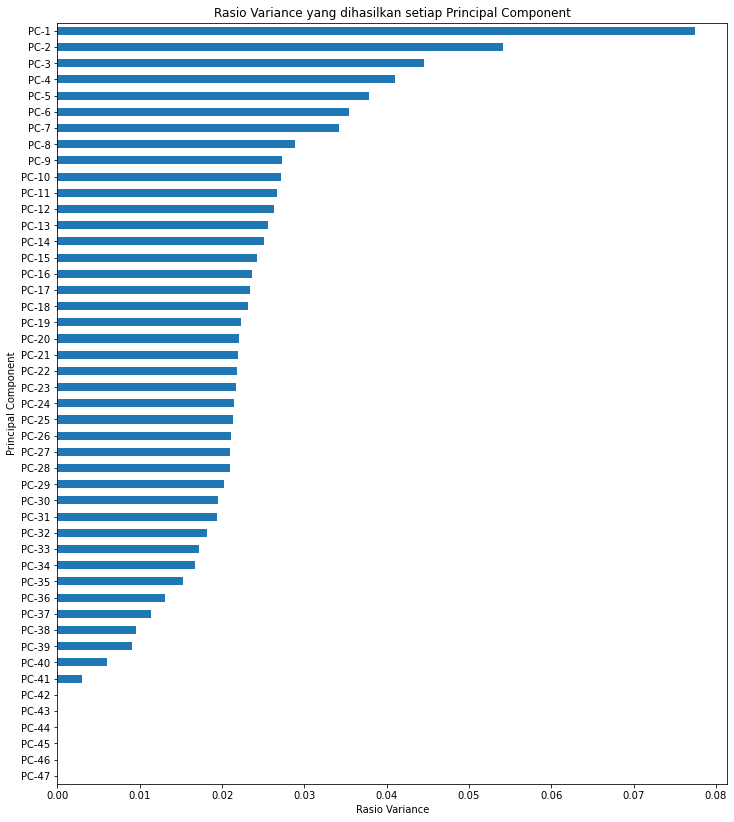

In [84]:
plt.figure(figsize=(12,14))
pca_variance['PC Variance'].plot(kind='barh')
plt.yticks(ticks=range(0,X_train.shape[1]), labels=pca_variance['pc_name'])
plt.title('Rasio Variance yang dihasilkan setiap Principal Component')
plt.xlabel('Rasio Variance')
plt.ylabel('Principal Component')
plt.show()

Mencari jumlah principal component terbaik

Ada beberapa metode untuk menentukan jumlah principal component terbaik yang harus digunakan. Salah satu sumber menyebutkan:

1. Jumlah PC terbaik yang terpilih adalah PC yang menghasilkan nilai eigen lebih besar atau sama dengan 1



In [85]:
# Mencari jumlah n_component yang menghasilkan nilai eigen value >= 1
def find_best_n_components(pca):
    """
        Deskripsi Fungsi:
        - Fungsi untuk mencari jumlah principal component terbaik dari hasil PCA pada data latih 
        dengan syarat nilai eigen PC >= 1
        
        Parameter Fungsi:
        -pca : model pca yang sudah difitting pada data latih
        
        Return Fungsi:
        -n_best_component: jumlah principal component terbaik yang memenuhi syarat
        
    """
    
    n_best_component = 0
    for i in range(0,len(pca.explained_variance_)):
        if pca.explained_variance_[i]>=1:
            n_best_component+=1
    
    return n_best_component

In [86]:
# mencari jumlah principal component terbaik
n_components = find_best_n_components(pca_)
print('Jumlah n Principal Component terbaik = {} komponen'.format(n_components))
print('Informasi yang dijelaskan oleh {} komponen = {} %'.format(n_components,(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))
print('Kehilangan Informasi = {} %'.format(100-(np.sum(pca_.explained_variance_ratio_[:n_components]))*100))

Jumlah n Principal Component terbaik = 25 komponen
Informasi yang dijelaskan oleh 25 komponen = 75.83492148531448 %
Kehilangan Informasi = 24.16507851468552 %


Instansiasi PCA dengan n component terbaik

    1. Buat PCA dengan n component terbaik
    2. Fitting ke data latih
    3. Transform ke atribut data latih dan data uji


In [87]:
# instansiasi objek PCA
pca_ = PCA(n_components=n_components)

# fit into training data
pca_.fit(X_train)

# transform into train and test data
X_train_pca = pca_.transform(X_train)
X_test_pca = pca_.transform(X_test)

In [88]:
# Buat DataFrame hasil perhitungan PCA

train_pca_df = pd.DataFrame(data=X_train_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
train_pca_df['target'] = y_train.to_numpy()

test_pca_df = pd.DataFrame(data=X_test_pca,columns=['PC-'+str(i) for i in range(0,n_components)])
test_pca_df['target'] = y_test.to_numpy()

In [89]:
# Data yang siap dimodelkan
train_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,target
0,-2.001003,2.333193,1.787499,0.495418,-0.388686,-0.340459,-0.020760,-1.888295,-0.275874,0.368826,...,0.515381,0.467920,0.192681,-0.476949,0.132950,-0.114963,-0.195311,-0.608599,-0.131701,0
1,-1.985632,1.934310,-1.458936,-1.469844,0.220835,0.090776,0.188612,-0.275668,-1.372592,1.114767,...,0.125192,-0.005940,0.046826,0.693472,-0.373527,-0.391554,0.074638,0.112218,0.115230,0
2,0.251685,-2.174737,0.032455,-0.519473,1.775246,1.155015,-0.065166,0.157891,0.207281,1.458197,...,0.648213,-1.019078,-0.002667,-0.295356,0.001648,-0.757581,0.351131,-0.069682,-0.224970,0
3,-2.007022,2.199128,-0.226163,-1.600379,0.296875,-2.005381,0.598151,-0.189214,-1.195593,0.972114,...,0.663673,-0.044279,0.321482,-0.057334,0.123215,-0.440270,-0.289837,-0.203625,-0.137837,0
4,0.824406,-2.267447,-1.327028,-0.394166,-1.201121,-1.211830,-0.125556,0.445765,1.619706,0.911771,...,0.785886,1.448994,0.482526,-0.245335,-0.776290,-0.180803,-0.954329,-0.170998,-0.152906,0


In [90]:
# target
y_train.head()

549      0
1974     0
20992    0
1730     0
26913    0
Name: y, dtype: int32

In [91]:
# Data uji
test_pca_df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,...,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,target
0,3.005894,1.629581,0.250574,-0.885281,1.238373,1.128071,-2.732716,0.327022,-1.194482,-1.207614,...,0.057845,0.402166,0.221005,-0.116657,0.718318,0.038296,-0.502070,0.567156,-0.254098,0
1,-1.204419,0.346640,-1.218698,1.574329,-1.130544,-0.642645,-0.693049,-0.384568,0.714750,1.902862,...,0.411492,0.518645,0.537334,-0.220165,-0.248059,0.109039,-0.048344,-0.269228,0.163435,0
2,2.345116,2.956956,1.006154,-2.638218,-0.017300,-2.085441,-1.651810,0.057018,-1.631887,0.531486,...,0.615646,-0.891570,-0.090171,1.103640,0.197247,-0.688376,0.162537,0.110248,0.175479,0
3,-1.814163,1.015039,-2.284215,0.861456,-0.576744,1.439037,-0.015767,1.315127,-1.236297,0.665336,...,-0.515343,0.587231,-0.396250,0.721519,0.314061,0.050070,-0.525945,0.188020,0.539720,0
4,-0.177084,-1.108061,0.543546,-1.217903,-0.575605,2.118512,0.823850,0.194312,-0.874659,0.607957,...,2.463135,1.476734,-0.379897,1.035108,0.595196,0.324541,-1.177654,-0.030149,0.269339,0


In [92]:
# target
y_test.head()

32884    0
3169     0
32206    0
9403     0
14020    0
Name: y, dtype: int32

Modelling

Model klasifikasi machine learning yang digunakan pada tugas ini yaitu:

    1. Logistic Regression
    2. KNN
    3. SVM
    4. Decision Tree
    5. Random Forest
    6. Naive Bayes

Recall akan digunakan sebagai penilaian model karena pada permasalahan ini bertujuan untuk meminimumkan False Negative Confusion matrix:  Predicted   0(No) 1(yes) 0(No) 1(yes)

Alur

    1. Setiap model akan dilihat performanya dengan akurasi untuk pertama kali. Semua model yang
       digunakan akan menggunakan default parameter pada masing-masing model.
    2. Hasil akurasi setiap model akan dibandingkan dengan boxplot
    3. Setiap model akan dituning dengan memilih metric recall
    4. Model dengan rata-rata recall terbaik akan dipilih sebagai model terbaik.
    5. Model terbaik tersebut akan dituning kembali dengan menerapkan undersampling pada dataset 
       karena dataset memiliki kelas yang unbalanced

In [93]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'

In [94]:
# buat list dari seluruh model yang digunakan
models = []

# append model
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))

#k-fold cross validation initialization object
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

In [95]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    """
        Deskripsi Function:
        - Fungsi ini digunakan untuk melakukan model cross-validation dengan data latih yang ada. Setiap model
        akan divalidasi dengan ukuran skor (scoring) yang telah ditetapkan, semisal (akurasi, recall, etc).
        
        Function parameters:
        - models: list of tuples dari model yang ingin dituning (LogisticRegression, SVM, etc)
        - X_train: dataframe atau np.array dari atribut data latih yang sudah dipreprocessing
        - y_train: dataframe atau np.array dari target data latih yang sudah dipreprocessing
        - kfold: objek hasil instansiasi kelas KFold 
        - scoring: metode untuk memngukur performa model (accuracy, recall, precision, etc)
        
        Function returns:
        - cv_results: List dari hasil cross validation setiap model yang sudah dituning
        - model_names: List dari nama setiap model (string)
        - print_msg: List berupa pesan untuk menampilkan model dengan hasil performanya pada data validasi
    """
    cv_results = [] #menampung hasil crossvalidation setiap model
    model_names = [] #menampung nama model
    print_msg = [] #menampung pesan yang akan ditampilkan
    
    
    for model_name, model in models:
        #cross validation result
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)

        #append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        #print result
        msg_result = "{}: mean {} = {}  std {} = {}".format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results,model_names,print_msg

Hitung mean dan std dari akurasi dari setiap model yang digunakan

Validasi yang digunakan adalah 10-fold cross-validation


In [97]:
cv_results_accuracy, model_names, print_msg_accuracy=perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [98]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.9017512920363625  std accuracy = 0.0028129000487849905
K-Nearest Neighbor: mean accuracy = 0.8942085759993965  std accuracy = 0.003894749188180054
Support Vector Machine: mean accuracy = 0.9008125711759337  std accuracy = 0.003294551473047011
Decision Tree: mean accuracy = 0.8680197820641361  std accuracy = 0.003356221486224402
Random Forest: mean accuracy = 0.9018808466413339  std accuracy = 0.002855678217151524
Naive Bayes: mean accuracy = 0.881065551529019  std accuracy = 0.0032263672358249723


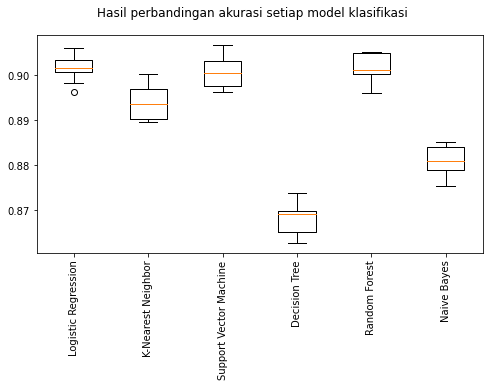

In [99]:
# Bandingkan hasil akurasi setiap model
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

Analisa:

    1. Dari segi akurasi Logistic Regression, SVM, dan Random Forest tampil menjadi model terbaik dengan rata-rata akurasi ketiga model ini yang hampir sama.
    2. Decision Tree dan Naive Bayes memberikan performa akurasi paling rendah

Melihat confusion matrix dari SVM

Ukuran performa yang digunakan pada permasalahan ini adalah memaksimalkan recall


In [100]:
# inisialisasi model SVM dengan default parameter
svm = SVC()

# fit model into training data
svm.fit(X_train_pca,y_train)

# get y prediction
y_pred = svm.predict(X_test_pca)

In [101]:
# print results
print("SVM Recall score = ", metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

SVM Recall score =  0.28274067649609713
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9144
           1       0.65      0.28      0.39      1153

    accuracy                           0.90     10297
   macro avg       0.78      0.63      0.67     10297
weighted avg       0.89      0.90      0.88     10297

[[8965  179]
 [ 827  326]]


ANALISIS HASIL CONFUSION MATRIX SVM

Model SVM walaupun memberikan nilai rata-rata akurasi tertinggi, namun nyatanya masih belum maksimal dalam memberikan recall terbaik. Hal ini dibuktikan dengan nilai FN yang besar yaitu 629 dibandingkan TP yaitu 306.

Penting!! Nilai FN dan TP mungkin bervariasi seiring kode program dijalankan dan komputer yang digunakan. Namun, saat dijalankan SVM muncul memberikan hasil seperti di atas


Model Tuning dengan memilih metriks evaluasi yang benar

Recall akan digunakan untuk mentuning model yang digunakan


In [102]:
cv_results_recall, model_names, print_msg_recall = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_recall
)

In [103]:
# cetak hasil rata-rata recall setiap model
for msg in print_msg_recall:
    print(msg)

Logistic Regression: mean recall = 0.27730220709615355  std recall = 0.0213744115887251
K-Nearest Neighbor: mean recall = 0.28836606620611616  std recall = 0.018568893504056747
Support Vector Machine: mean recall = 0.26804794386340614  std recall = 0.02590587344817902
Decision Tree: mean recall = 0.419723271405244  std recall = 0.02141199819617221
Random Forest: mean recall = 0.34249201820868513  std recall = 0.025524469028798107
Naive Bayes: mean recall = 0.3939392119854656  std recall = 0.029737336526829843


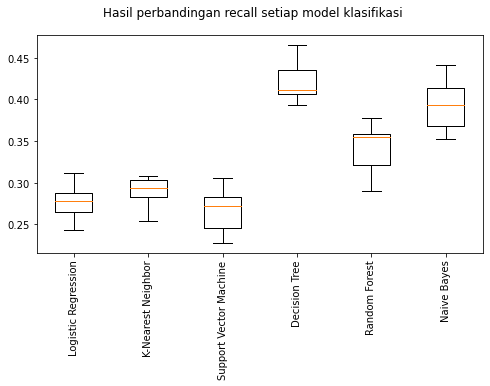

In [104]:
# Bandingkan hasil recall setiap model

fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan recall setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_recall)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

ANALISIS

    1. Decision Tree dan Naive Bayes tampil dengan rata-rata recall terbaik dibandingkan model-model 
       lainnya.
    2. Akurasi pada dataset yang imbalanced tidak bisa menjadi penentu untuk memilih model. Bisa
       dilihat bahwa SVM tidak mampu memberikan performa recall yang terbaik, padahal sebelumnya 
       model ini memberikan akurasi tertinggi.

In [105]:
# inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# fit model into training data
dt.fit(X_train_pca,y_train)

# get y prediction
y_pred_dt = dt.predict(X_test_pca)

In [106]:
# print score
print("Accuracy score Decision Tree = ", metrics.accuracy_score(y_test,y_pred_dt))
print(metrics.classification_report(y_test,y_pred_dt))

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_dt))

Accuracy score Decision Tree =  0.8640380693405847
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9144
           1       0.40      0.43      0.42      1153

    accuracy                           0.86     10297
   macro avg       0.66      0.68      0.67     10297
weighted avg       0.87      0.86      0.87     10297

[[8399  745]
 [ 655  498]]


In [108]:
# menyatukan atribut dan target pada data latih
df = pd.concat([pd.DataFrame(data=X_train_pca),y_train.reset_index()['y']],axis=1)

In [109]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,y
0,-2.001003,2.333193,1.787499,0.495418,-0.388686,-0.340459,-0.020760,-1.888295,-0.275874,0.368826,...,0.515381,0.467920,0.192681,-0.476949,0.132950,-0.114963,-0.195311,-0.608599,-0.131701,0
1,-1.985632,1.934310,-1.458936,-1.469844,0.220835,0.090776,0.188612,-0.275668,-1.372592,1.114767,...,0.125192,-0.005940,0.046826,0.693472,-0.373527,-0.391554,0.074638,0.112218,0.115230,0
2,0.251685,-2.174737,0.032455,-0.519473,1.775246,1.155015,-0.065166,0.157891,0.207281,1.458197,...,0.648213,-1.019078,-0.002667,-0.295356,0.001648,-0.757581,0.351131,-0.069682,-0.224970,0
3,-2.007022,2.199128,-0.226163,-1.600379,0.296875,-2.005381,0.598151,-0.189214,-1.195593,0.972114,...,0.663673,-0.044279,0.321482,-0.057334,0.123215,-0.440270,-0.289837,-0.203625,-0.137837,0
4,0.824406,-2.267447,-1.327028,-0.394166,-1.201121,-1.211830,-0.125556,0.445765,1.619706,0.911771,...,0.785886,1.448994,0.482526,-0.245335,-0.776290,-0.180803,-0.954329,-0.170998,-0.152906,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30886,-1.338142,1.467508,1.676182,2.728510,1.447108,1.501811,-1.173740,-1.777846,0.335509,0.481750,...,-1.539570,-0.148946,0.201206,0.117133,-0.512000,-0.104824,0.475090,0.068281,0.031263,0
30887,-1.521543,0.337434,-1.548136,2.233438,-0.857555,-1.356153,-0.352735,1.893284,2.648395,0.339308,...,-1.168565,-1.394700,0.429181,0.971632,1.192566,-0.544231,-0.522555,-0.098907,0.537229,0
30888,5.535940,1.926155,-1.499952,1.491914,-0.211802,1.964501,3.712515,-0.121867,1.000919,1.959211,...,-0.068810,0.982232,1.588767,1.928311,-2.237971,-2.419110,-1.662284,1.529438,-2.443808,1
30889,-1.341161,0.606638,-1.282209,1.455292,-0.916875,-1.466084,-1.109682,-1.402691,1.690604,-0.918520,...,-0.658582,-1.294284,0.874491,-0.021457,0.794153,-0.184994,-0.187920,-0.402942,0.498909,0


In [110]:
# melihat banyak setiap nilai pada label kelas
df['y'].value_counts()

0    27404
1     3487
Name: y, dtype: int64

In [111]:
# under-sampling kelas 'No' menjadi 3705
no_df = df[df['y']==0][:df['y'].value_counts()[1]]
yes_df = df[df['y']==1]

In [112]:
# Menggabungkan dataset yang setiap kelasnya sudah balanced menjadi 1

normal_distributed_df = pd.concat([yes_df,no_df])

# shuffle row pada data yang sudah digabung agar acak
bank_df_normal_distributed = normal_distributed_df.sample(frac=1, random_state=42)

In [113]:
bank_df_normal_distributed.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,y
1104,-1.722713,0.455843,0.062984,2.302844,3.434057,0.441818,-0.281869,2.201805,-0.445057,-1.617615,...,-0.744109,0.652981,-0.048646,-0.210475,0.439280,0.460011,-0.604430,0.048581,0.068799,1
6595,-1.367077,0.547336,-1.672466,0.208602,1.459133,-0.357919,0.081314,-1.846431,-0.082432,0.149616,...,-0.210904,1.584569,0.617859,-1.589839,0.805132,0.945145,-1.144172,0.083081,0.193841,1
5181,0.251038,-2.257251,-0.036332,-0.403975,0.903557,-0.547725,0.969233,-0.871797,1.184225,-0.761816,...,-0.982571,0.784370,-0.266198,0.452524,0.694024,0.830213,-0.640674,0.032958,0.644927,1
8341,0.425584,-2.357784,-0.968656,-0.527631,-1.312349,-0.598033,1.459778,0.228779,1.231965,1.554945,...,-0.718334,1.258391,-0.200041,1.526172,0.330343,0.549539,-0.586059,0.248234,0.520826,1
3674,0.219219,-2.506667,0.860779,1.531554,0.979811,-0.266484,-0.576157,-1.148557,-0.552913,-0.587629,...,0.374928,-1.439501,0.251766,-1.975282,0.896159,-0.310428,0.193670,0.141196,-0.099589,0


In [114]:
# split attributes dan target

X_train_balanced = bank_df_normal_distributed.drop('y',axis=1)
y_train_balanced = bank_df_normal_distributed['y']

In [116]:
# Lihat distribusi dari data train yang sudah disampling
print('Distribusi setiap kelas dari subsampel dataset')
print(bank_df_normal_distributed['y'].value_counts()/len(bank_df_normal_distributed))

Distribusi setiap kelas dari subsampel dataset
1    0.5
0    0.5
Name: y, dtype: float64


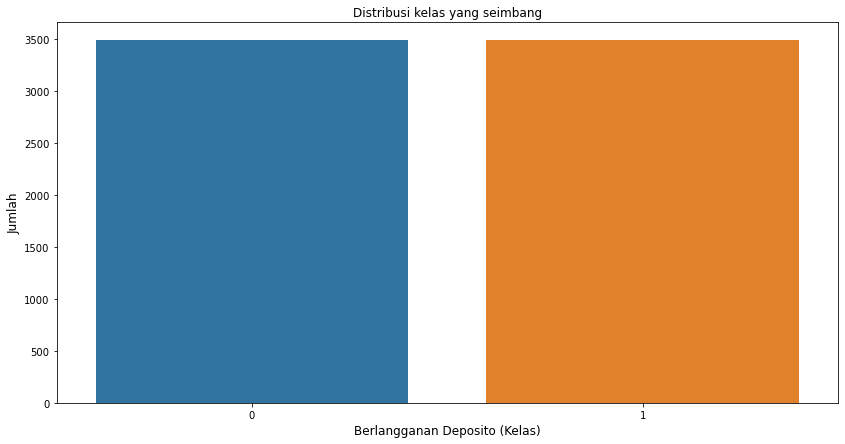

In [120]:
plt.figure(figsize=(14,7))
sns.countplot(x='y', data=bank_df_normal_distributed)
plt.title('Distribusi kelas yang seimbang', fontsize=12)
plt.xlabel('Berlangganan Deposito (Kelas)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

In [121]:
# Model Training

cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_balanced,
    y_train=y_train_balanced,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [122]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.8035512408891154  std accuracy = 0.015896498963244292
K-Nearest Neighbor: mean accuracy = 0.7506371966635561  std accuracy = 0.019873477722257647
Support Vector Machine: mean accuracy = 0.8416958886426888  std accuracy = 0.012457426761898548
Decision Tree: mean accuracy = 0.741038548342672  std accuracy = 0.012267348030269543
Random Forest: mean accuracy = 0.8282187681138566  std accuracy = 0.012116642071468812
Naive Bayes: mean accuracy = 0.6819525350149844  std accuracy = 0.016563821745806524


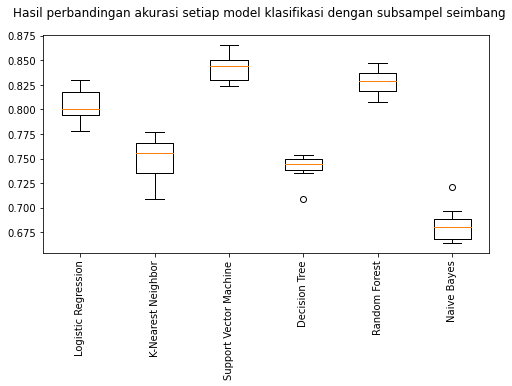

In [123]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi dengan subsampel seimbang')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy)
ax.set_xticklabels(model_names, rotation=90)
fig.set_size_inches(8,4)
plt.show()

Model SVM tampil memberikan rata-rata akurasi tertinggi ketika model dilatih dengan data latih yang seimbang.

In [124]:
# inisialisasi model
svm_balanced = SVC()

# fit model into training data
svm_balanced.fit(X_train_balanced,y_train_balanced)

# get y prediction
y_pred_balanced = svm_balanced.predict(X_test_pca)

In [125]:
# print score
print("Accuracy score SVM with balanced subsample = ", metrics.accuracy_score(y_test,y_pred_balanced)," %")

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_balanced))

# hasil klasifikasi
print(metrics.classification_report(y_test,y_pred_balanced))

Accuracy score SVM with balanced subsample =  0.8330581722831892  %
[[7597 1547]
 [ 172  981]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9144
           1       0.39      0.85      0.53      1153

    accuracy                           0.83     10297
   macro avg       0.68      0.84      0.72     10297
weighted avg       0.91      0.83      0.86     10297



In [126]:
# Tuning hyperparameter dari model terbaik
# inisialisasi SVM model
svm_params_tuned = SVC()

# inisialisasi objek KFold dengan k=10
kfold = kfold

# inisialisasi daftar hyperparameter yang akan dituning
params_grid={
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma':['scale','auto'],
}

# instansiasi grid seach objek
grid_svm = GridSearchCV(
    estimator= svm_params_tuned,
    param_grid=params_grid,
    scoring=scoring_accuracy,
    cv = kfold
)

# fit grid objek ke data train
grid_results_ = grid_svm.fit(X_train_balanced,y_train_balanced)

In [127]:
# Cetak hyperparameter yang memberikan hasil terbaik
print('Best SVM Hyperparameter: {}'.format(grid_results_.best_params_))
print('Best SVM Accuracy Score: {}'.format(grid_results_.best_score_))

Best SVM Hyperparameter: {'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy Score: 0.8416958886426888


In [128]:
# Training model dengan hyperparameter optimal
# instansiasi objek SVM dengan hyperparameter optimal
svm_final = SVC(gamma=grid_results_.best_params_['gamma'],kernel=grid_results_.best_params_['kernel'])


# training
svm_final.fit(X_train_balanced,y_train_balanced)

# model evaluation using data testing
y_pred_final = svm_final.predict(X_test_pca)

In [129]:
# print score
print("Accuracy score Final Model SVM = ", metrics.accuracy_score(y_test,y_pred_final)," %")

# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred_final))

# hasil klasifikasi
print(metrics.classification_report(y_test,y_pred_final))

Accuracy score Final Model SVM =  0.8330581722831892  %
[[7597 1547]
 [ 172  981]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9144
           1       0.39      0.85      0.53      1153

    accuracy                           0.83     10297
   macro avg       0.68      0.84      0.72     10297
weighted avg       0.91      0.83      0.86     10297



Analisis:
1. Model SVM ini juga memberikan nilai akurasi yang terbilang cukup baik sebesar 83,31%
2. Model siap untuk digunakan dalam deployment